In [1]:
from madigan.environments import make_env
from madigan.utils.preprocessor import StackerDiscrete
from madigan.utils.config import make_config
from madigan.environments.cpp import HDFSource
from madigan.utils.data import State

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
config_trend_ou = make_config("TrendOU", assets=["trendOU1"],
                        data_source_type="TrendOU",
                        data_source_config=dict(
                            trend_prob=[.001],
                            noise_trend = [.001],
                            min_period=[100],
                            max_period=[200],
                            dYMin = [0.005],
                            dYMax = [0.01],
                            start = [5.0],
                            theta = [0.15],
                            phi = [.0],
                            ema_alpha = [0.3])
                        )
env_trend_ou = make_env(config_trend_ou)

In [3]:
config_hdf = make_config("HDF", assets=["audnzd"],
                        data_source_type="HDFSource",
                        data_source_config=dict(filepath="/media/hemu/Data/Markets/FX/working_data_aud_nzd.h5",
                                                main_key="aud_nzd",
                                                price_key="midprice",
                                                timestamp_key="timestamp",
                                                )
                        )
env_hdf = make_env(config_hdf)

In [4]:
hdfpath = ("/media/hemu/Data/Markets/FX/working_data_aud_nzd.h5")
main_key = 'aud_nzd'
price_key = 'midprice'
timestamp_key = 'timestamp'
datasource = HDFSource(str(hdfpath), main_key, price_key, timestamp_key)
datasource.getData()

array([1.25679])

In [5]:
window_trend_ou = StackerDiscrete(1280)
window_hdf = StackerDiscrete(1280)
# window_hdf.reset_state()
# class EnvHDF:
#     def __init__(self, dsource):
#         self.dsource = dsource
#     def step(self):
#         return State(self.dsource.getData(), 1, self.dsource.currentTime), 0., 1, 1
# env_hdf = EnvHDF(datasource)

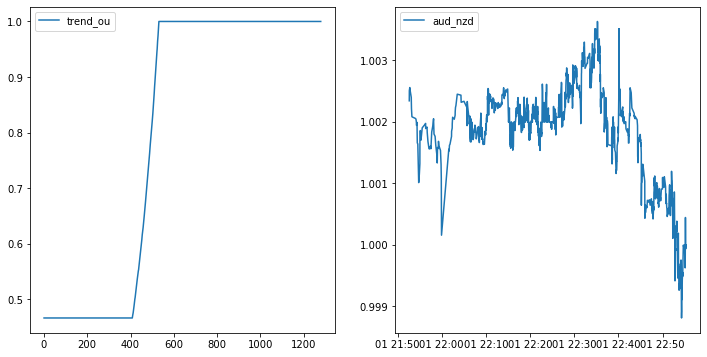

In [6]:
window_trend_ou.reset_state()
window_trend_ou.initialize_history(env_trend_ou)
window_hdf = StackerDiscrete(1280)
window_hdf.initialize_history(env_hdf)
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].plot(window_trend_ou.current_data().price, label='trend_ou')
ax[1].plot(pd.to_datetime(window_hdf.current_data().timestamp), window_hdf.current_data().price, label=main_key)
ax[0].legend()
ax[1].legend()

In [13]:
window_hdf.current_data()

State(price=array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]]), portfolio=array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]]), timestamp=array([3842, 3843, 3844, ..., 5119, 5120, 5121]))